<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

In [11]:
# Import the Required Packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os
from PIL import Image

In [12]:
import os
from google.colab import drive

drive.mount('/content/drive')
!ls "/content/drive/My Drive/"
base_dir = "/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Images"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Ngee Ann Poly'  'Udemy Courses'


## Baseline Model trained with Cleaned Data

In [13]:
img_size = 224

model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

In [14]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [15]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [16]:
checkpoint_filepath = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 1/model_1.tf'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [18]:
history = model_1.fit(
    train_generator,
    steps_per_epoch=375,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=100,
    callbacks=[model_checkpoint],
    verbose=1
)

Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 2.0455 - acc: 0.2553 
Epoch 1: val_acc improved from -inf to 0.32900, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 1/model_1.tf
375/375 [==============================] - 5655s 15s/step - loss: 2.0455 - acc: 0.2553 - val_loss: 1.8765 - val_acc: 0.3290
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 1.7809 - acc: 0.3724
Epoch 2: val_acc improved from 0.32900 to 0.40900, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 1/model_1.tf
375/375 [==============================] - 46s 123ms/step - loss: 1.7809 - acc: 0.3724 - val_loss: 1.6795 - val_acc: 0.4090
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 1.6113 - acc: 0.4427
Epoch 3: val_acc improved from 0.40900 to 0.44950, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 1/model_1.tf
375/375 [==============================]

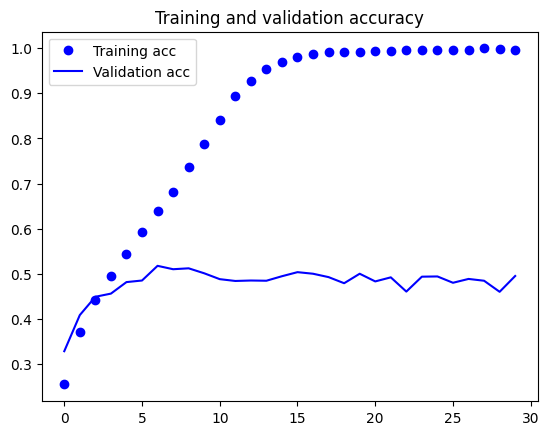

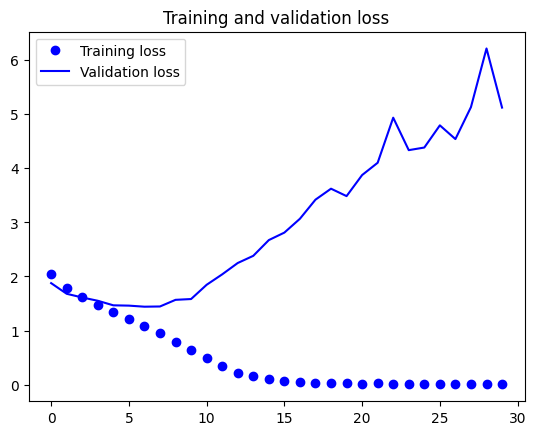

In [19]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
model_1 = keras.models.load_model('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 1/model_1.tf')

evaluation_results = model_1.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

25/25 [==============================] - 3s 91ms/step - loss: 1.5203 - acc: 0.4780
Test Loss: 1.5203131437301636
Test Accuracy: 0.4779999852180481


In [21]:
x_test = []
y_test = []

class_labels = {'beet_salad': 0, 'beignets': 1, 'ceviche': 2, 'chocolate_mousse': 3, 'cup_cakes': 4,
                'greek_salad': 5, 'grilled_salmon': 6, 'pancakes': 7, 'panna_cotta': 8, 'spaghetti_bolognese': 9}

for class_folder in sorted(os.listdir(test_dir)):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        class_label = class_labels[class_folder]

        for image_file in sorted(os.listdir(class_folder_path)):
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            x_test.append(img_array)
            y_test.append(class_label)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32') / 255.0

In [22]:
predictions = model_1.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)

# Get the true labels from the test data generator
true_labels = test_generator.classes

# Create the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

16/16 [==============================] - 1s 17ms/step
Classification Report:
                     precision    recall  f1-score   support

         beet_salad       0.74      0.46      0.57        50
           beignets       0.48      0.64      0.55        50
            ceviche       0.30      0.40      0.34        50
   chocolate_mousse       0.41      0.26      0.32        50
          cup_cakes       0.35      0.38      0.36        50
        greek_salad       0.54      0.58      0.56        50
     grilled_salmon       0.54      0.40      0.46        50
           pancakes       0.47      0.52      0.50        50
        panna_cotta       0.33      0.40      0.36        50
spaghetti_bolognese       0.81      0.68      0.74        50

           accuracy                           0.47       500
          macro avg       0.50      0.47      0.48       500
       weighted avg       0.50      0.47      0.48       500



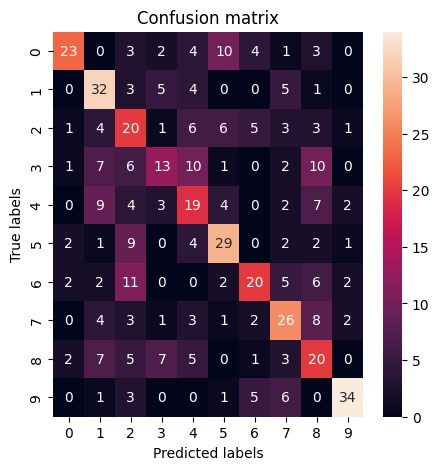

In [23]:
confusion_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [24]:
# Load the food list (in alphabetical order)
with open('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/18.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'beignets', 'ceviche', 'chocolate_mousse', 'cup_cakes', 'greek_salad', 'grilled_salmon', 'pancakes', 'panna_cotta', 'spaghetti_bolognese']


In [25]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

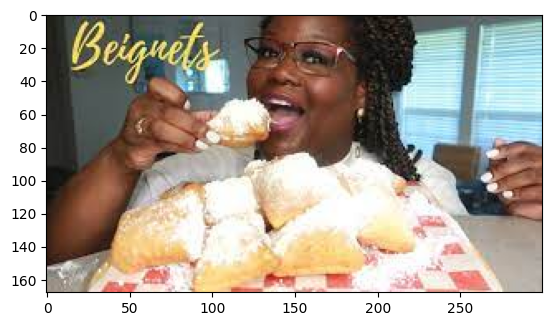

1/1 [==============================] - 0s 33ms/step

Image: beignets2.jpg
The prediction is: beignets 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.000502  0.462334  0.034889          0.190769   0.173538     0.000539   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.006995  0.082307     0.048087             0.000041  
----------------------------------------


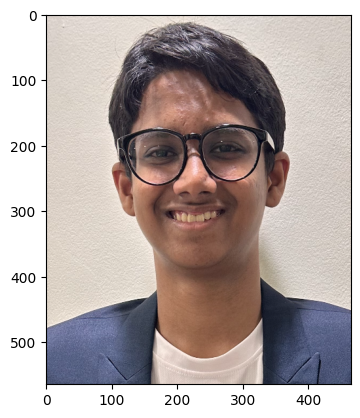

1/1 [==============================] - 0s 19ms/step

Image: person2.png
The prediction is: chocolate_mousse 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.012572  0.048434  0.012278          0.599319    0.08837     0.000944   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.006582  0.017514     0.211717              0.00227  
----------------------------------------


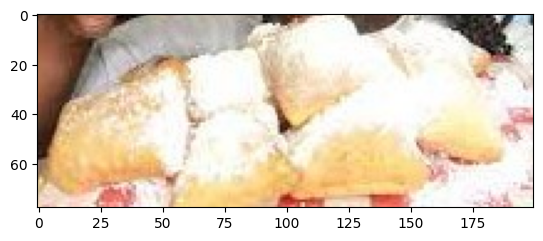

1/1 [==============================] - 0s 20ms/step

Image: beignets3.jpg
The prediction is: beignets 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0     0.00114  0.709828  0.001867          0.017383   0.026665     0.000004   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0         0.00138   0.01969     0.221752             0.000292  
----------------------------------------


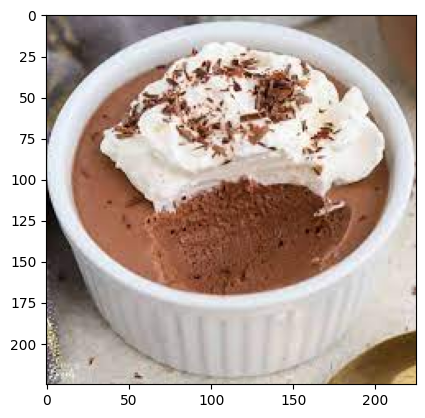

1/1 [==============================] - 0s 22ms/step

Image: chocolate mousse1.jpg
The prediction is: pancakes 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.000675  0.307902  0.024256          0.028966   0.001086     0.002158   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.001564  0.597648     0.019518             0.016225  
----------------------------------------


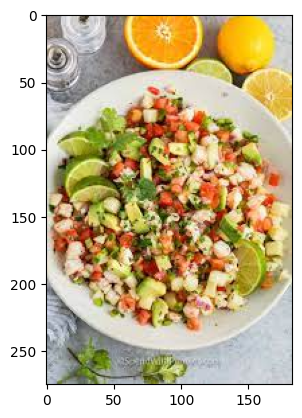

1/1 [==============================] - 0s 31ms/step

Image: ceviche1.jpg
The prediction is: greek_salad 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.006836  0.000005  0.144015          0.000027   0.000603     0.571495   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.177711  0.009378      0.00009              0.08984  
----------------------------------------


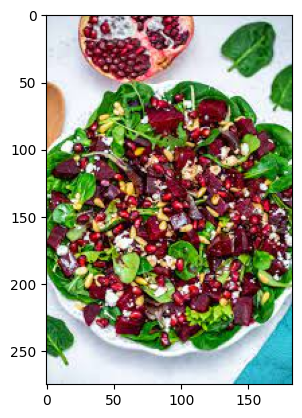

1/1 [==============================] - 0s 23ms/step

Image: beetsalad1.jpg
The prediction is: beet_salad 

    beet_salad      beignets       ceviche  chocolate_mousse     cup_cakes  \
0    0.999099  6.248831e-12  3.169880e-07      1.470384e-08  2.657693e-07   

   greek_salad  grilled_salmon      pancakes   panna_cotta  \
0     0.000773        0.000126  9.508777e-08  6.896526e-08   

   spaghetti_bolognese  
0         1.929435e-07  
----------------------------------------


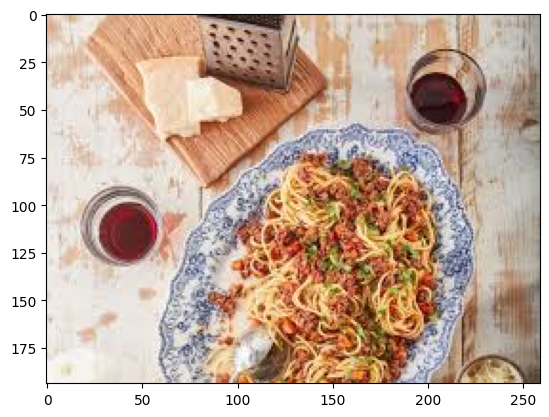

1/1 [==============================] - 0s 34ms/step

Image: spaghetti bolognese2.jpg
The prediction is: beignets 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.000066  0.808681  0.003825          0.012218   0.001317     0.000028   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.005449  0.113891      0.00018             0.054344  
----------------------------------------


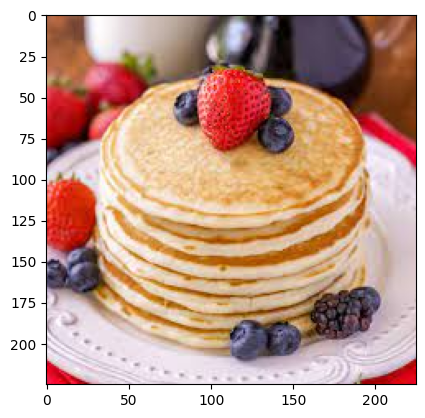

1/1 [==============================] - 0s 28ms/step

Image: pancake1.jpg
The prediction is: pancakes 

    beet_salad  beignets  ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.000017  0.004405  0.00461          0.002281   0.024202     0.000017   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.000764  0.958507     0.002857             0.002341  
----------------------------------------


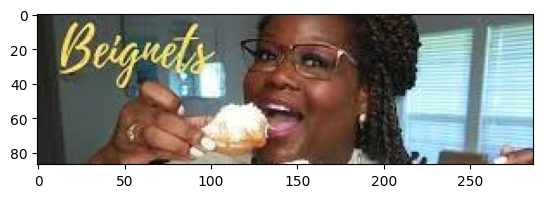

1/1 [==============================] - 0s 35ms/step

Image: person1.jpg
The prediction is: chocolate_mousse 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.004805  0.060558  0.132805          0.485288   0.173701     0.002332   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.098876  0.023237     0.017912             0.000485  
----------------------------------------


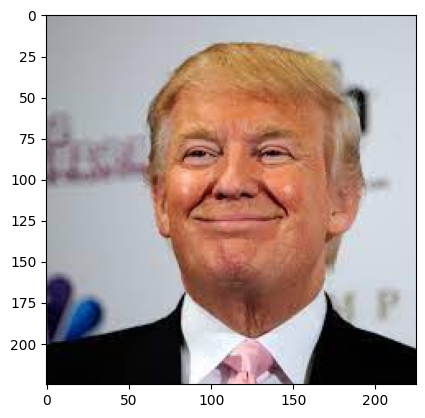

1/1 [==============================] - 0s 52ms/step

Image: donald trump.jpg
The prediction is: beignets 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.004301  0.226942  0.137988          0.115629   0.092045     0.000679   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.172944  0.076789     0.158644             0.014039  
----------------------------------------


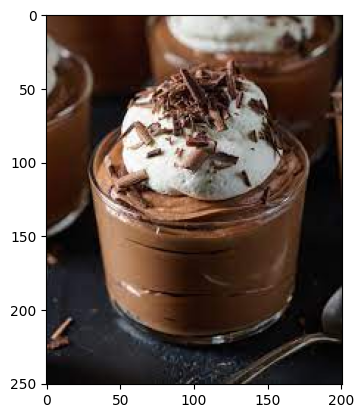

1/1 [==============================] - 0s 42ms/step

Image: chocolate mousse2.jpg
The prediction is: beignets 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.000813  0.558135  0.014858          0.218598   0.037283     0.005025   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.002274  0.125788     0.024712             0.012512  
----------------------------------------


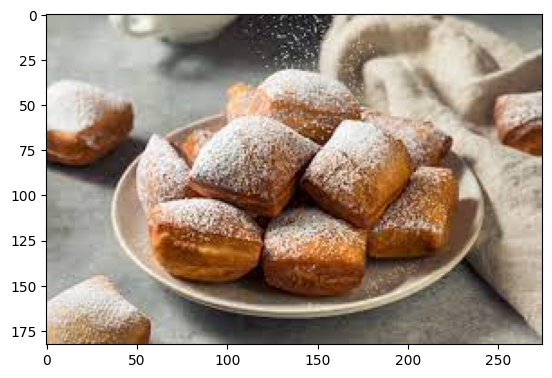

1/1 [==============================] - 0s 33ms/step

Image: beignets1.jpg
The prediction is: beignets 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.000028  0.957948  0.001191          0.002088   0.003343     0.000037   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.000128  0.032039     0.000153             0.003046  
----------------------------------------


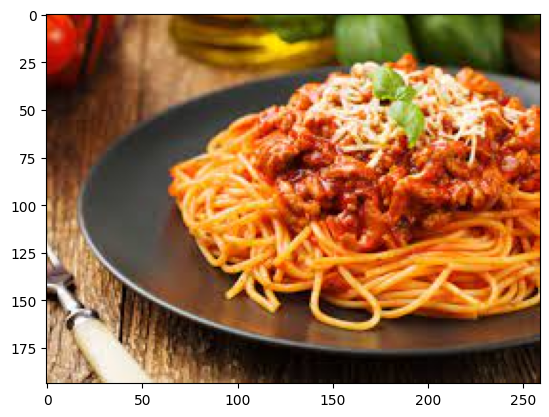

1/1 [==============================] - 0s 27ms/step

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese 

    beet_salad  beignets  ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.000371  0.002245  0.01742          0.000812   0.001518     0.000492   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.166193  0.012936     0.000181             0.797831  
----------------------------------------


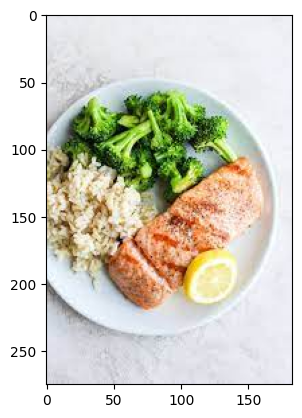

1/1 [==============================] - 0s 28ms/step

Image: grilled salmon1.jpg
The prediction is: grilled_salmon 

    beet_salad      beignets   ceviche  chocolate_mousse  cup_cakes  \
0    0.012825  2.505157e-07  0.306573          0.000216   0.000947   

   greek_salad  grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0     0.001369        0.660121  0.000152     0.000546              0.01725  
----------------------------------------


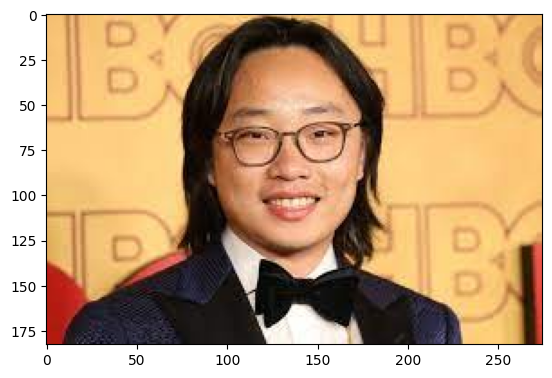

1/1 [==============================] - 0s 52ms/step

Image: asian guy1.jpg
The prediction is: cup_cakes 

    beet_salad  beignets   ceviche  chocolate_mousse  cup_cakes  greek_salad  \
0    0.165136  0.067581  0.122676          0.105558   0.400857     0.006488   

   grilled_salmon  pancakes  panna_cotta  spaghetti_bolognese  
0        0.060126   0.00203     0.069414             0.000135  
----------------------------------------


In [26]:
online_images_dir = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Online Images'
image_files = os.listdir(online_images_dir)

for image_file in image_files:
    img_path = os.path.join(online_images_dir, image_file)
    plt.imshow(plt.imread(img_path))
    plt.show()

    img_array = image_process(img_path)
    prob_df, result = prediction(model_1, img_array, food_list)

    print(f'\nImage: {image_file}')
    print('The prediction is:', result, '\n\n', prob_df)
    print('-' * 40)

## Baseline Model trained with Uncleaned Data

In [ ]:
# Test Loss: 1.5089426040649414
# Test Accuracy: 0.47600001096725464

# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.47      0.56      0.51        50
#            beignets       0.67      0.48      0.56        50
#             ceviche       0.40      0.28      0.33        50
#    chocolate_mousse       0.45      0.40      0.43        50
#           cup_cakes       0.42      0.46      0.44        50
#         greek_salad       0.49      0.70      0.57        50
#      grilled_salmon       0.35      0.56      0.43        50
#            pancakes       0.63      0.44      0.52        50
#         panna_cotta       0.34      0.28      0.31        50
# spaghetti_bolognese       0.77      0.68      0.72        50

#            accuracy                           0.48       500
#           macro avg       0.50      0.48      0.48       500
#        weighted avg       0.50      0.48      0.48       500

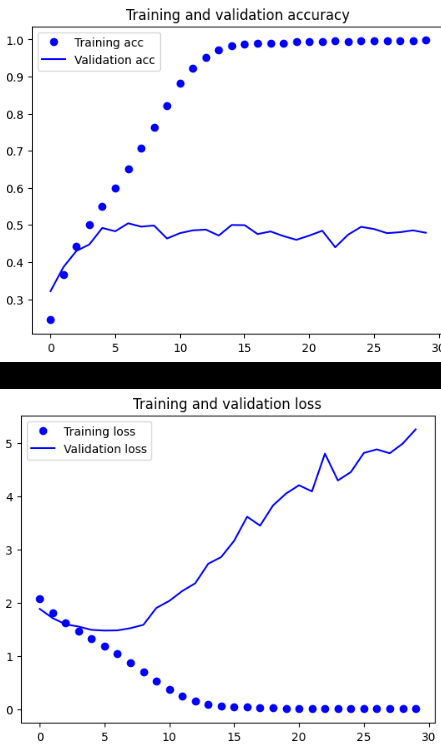

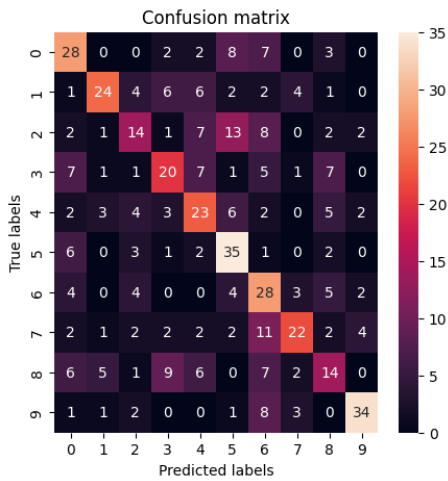

Image: spaghetti bolognese2.jpg
The prediction is: beignets

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: pancake1.jpg
The prediction is: pancakes

Image: chocolate mousse1.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: chocolate_mousse

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: ceviche1.jpg
The prediction is: greek_salad

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: beignets3.jpg
The prediction is: beignets

Image: donald trump.jpg
The prediction is: grilled_salmon

Image: person1.jpg
The prediction is: chocolate_mousse

Image: person2.png
The prediction is: chocolate_mousse

Image: asian guy1.jpg
The prediction is: cup_cakes